In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import sklearn
print(sklearn.__version__)

0.23.2


In [3]:
%matplotlib inline

In [4]:
# load the Boston Housing dataset and separate the features from the target variable which is the price
data = pd.read_csv('housing.csv')
print(data)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
f"Boston housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each"


        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25   5.599  16.51     21.0  291900.0
2

'Boston housing dataset has 489 data points with 4 variables each'

In [5]:
# some statistical calculations: min,max,median,std deviation of the price
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

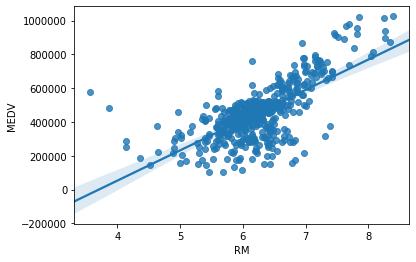

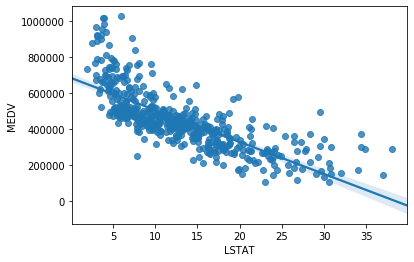

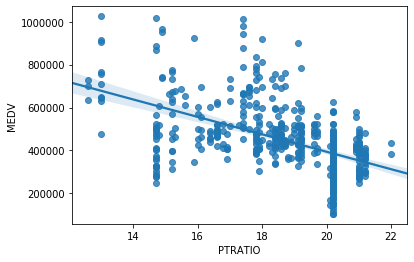

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in ['RM', 'LSTAT', 'PTRATIO']:
    sns.regplot(data[var],prices)
    plt.show()

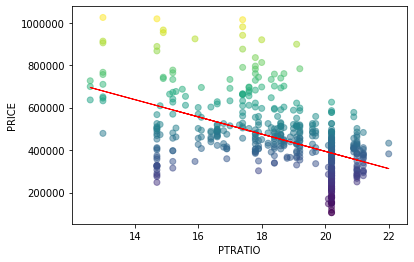

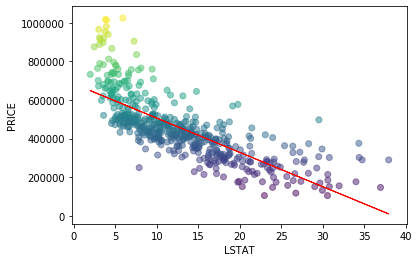

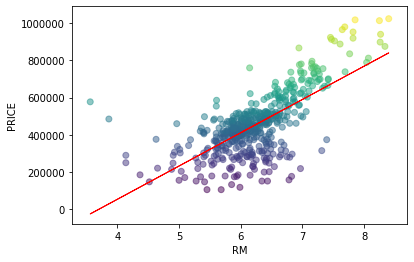

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
pt_ratio = data['PTRATIO'].values.reshape(-1,1)
reg.fit(pt_ratio, prices)
plt.plot(pt_ratio, reg.predict(pt_ratio), color='red', linewidth=1)
plt.scatter(pt_ratio, prices, alpha =0.5, c=prices)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

l_stat = data['LSTAT'].values.reshape(-1,1)
reg.fit(l_stat, prices)
plt.plot(l_stat, reg.predict(l_stat), color='red', linewidth=1)
plt.scatter(l_stat, prices, alpha =0.5, c=prices)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

rm = data['RM'].values.reshape(-1,1)
reg.fit(rm, prices)
plt.plot(rm, reg.predict(rm), color='red', linewidth=1)
plt.scatter(rm, prices, alpha =0.5, c=prices)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()


In [8]:
# using coefficient of determination as a performance metric
from sklearn.metrics import r2_score

def performace_metric(y_true, y_predict):
    """ Calculate and return the performance score between True and
        predicted values based on the metric chosen """
    score = r2_score(y_true, y_predict)
    
    return(score)

In [9]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.2, random_state=42)

In [11]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import SuffleSplit

def fit_model(X,y):
    """ Performs a grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X,y]"""
    #Create cross validation sets from the training data 
    cv_sets = SuffleSplit(n_splits=10, test_size = 0.20, random_state = 40)
    
    regressor = DecisionTreeRegressor(random_state=41)
    # Dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":range(1,11)}
    
    # transform performance metric into a scoring funtion using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)
    
    #create a search grid object
    grid = GridSearchCV(regressor, params, scoring_fnc, cv_sets)
    
    #fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X,y)
    
    #return the optimal model after fitting the data 
    return grid.best_estimator_           
   

ImportError: cannot import name 'SuffleSplit' from 'sklearn.model_selection' (C:\Users\laaja\Anaconda\lib\site-packages\sklearn\model_selection\__init__.py)

In [ ]:
# fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

f"Parmeter 'max_depth' is {reg.get_params()['max_depth']} for the optimal model"